### Environment

In [1]:
import gym
import random
import numpy as np

In [2]:
environment = gym.make("FrozenLake-v1", is_slippery=False)
environment.reset()
environment.render()


SFFF
FHFH
FFFH
HFFG


### Q-table

In [3]:
nb_states = environment.observation_space.n
nb_actions = environment.action_space.n

In [4]:
nb_states


16

In [5]:
nb_actions

4

In [6]:
qtable = np.zeros((nb_states, nb_actions))

In [7]:
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [8]:
random.choice(["LEFT", "DOWN", "RIGHT", "UP"]) # Gives us a random movement

'DOWN'

In [9]:
environment.action_space.sample() # Outcomes are numbers where [0 = LEFT, 1 = DOWN, 2 = RIGHT, 3 = UP]

2

In [10]:
environment.step(2) # Moves to the right
environment.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


In [12]:
action = environment.action_space.sample()

new_state, reward, done, info = environment.step(action)

environment.render()
print(f'Reward = {reward}') # Reward will be zero until the goal is reached

  (Up)
SFFF
FHFH
FFFH
HFFG
Reward = 0.0


### Q-Learning

Q-table before training: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training: 
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.      0.81    0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


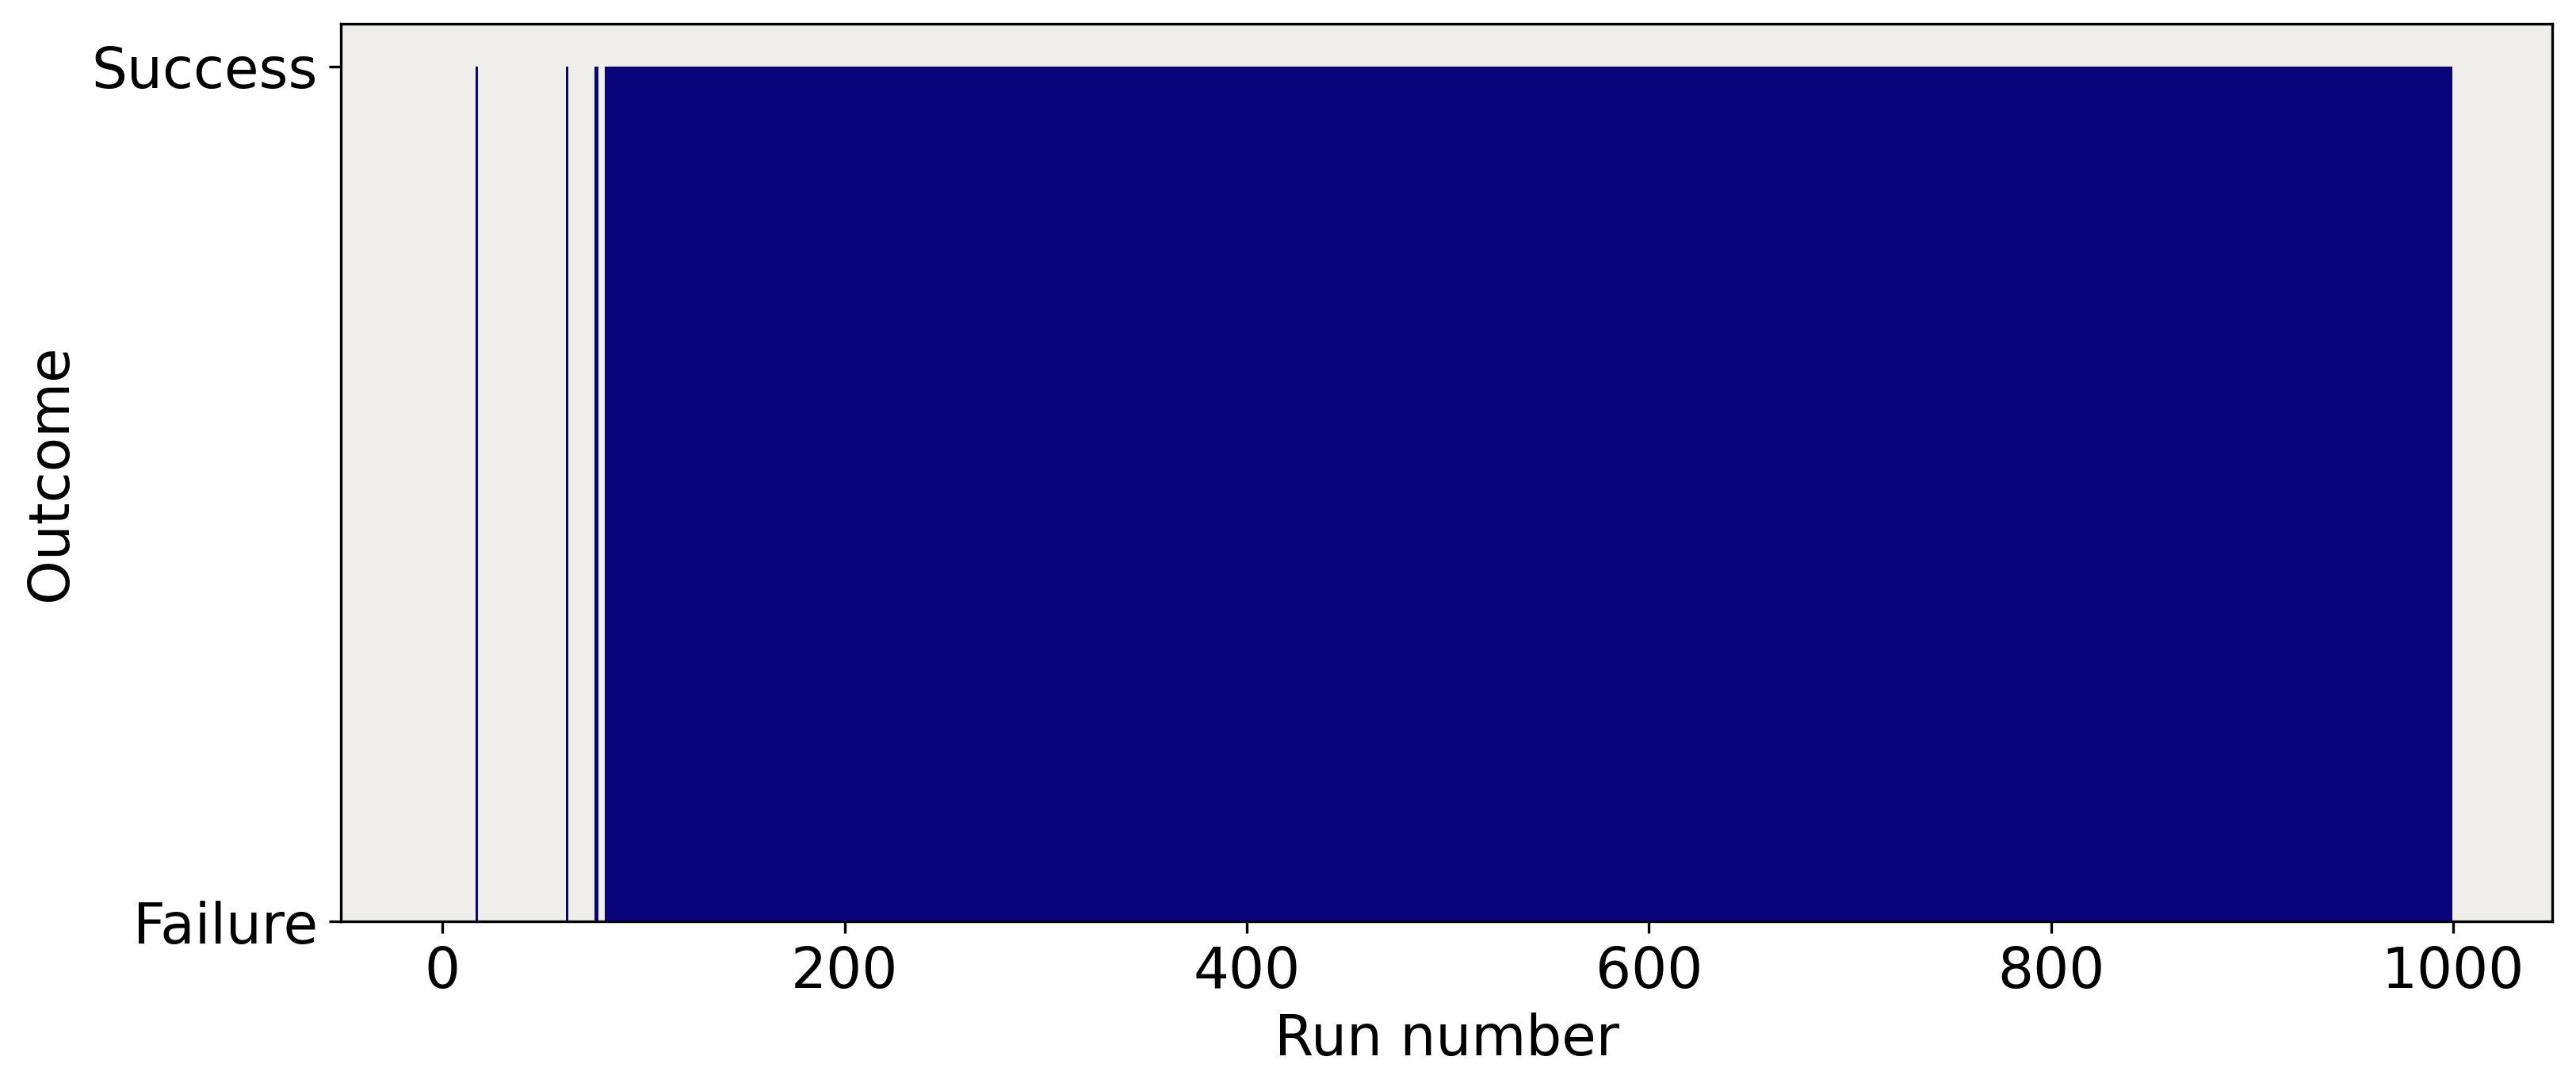

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# re-initialise the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000
alpha = 0.5
gamma = 0.9


# List of outcomes
outcomes = []

print('Q-table before training: ')
print(qtable)

# Training

for _ in range(episodes):
    state = environment.reset()
    done = False
    
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # We will keep training the agent until it gets stuck in a hole or has reached the end goal
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        
        # If there are not any highest values, choose zero at random
        else:
            action = environment.action_space.sample()
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
        
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state
        
        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"

print()
print('==================================')
print('Q-table after training: ')
print(qtable)


# plot

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color='#0A047A', width=1.0)
plt.show()

The agent is now trained, where each blue bar indicates a win. We can see around the 100th episode is where the agent has successfully won for the first time. After a few episodes of the win, the agent understands how to win the game and it constantly wins every game afterwards.

We now check this with 100 episodes. As we see the training is complete, we have no need to update our Q-table any further. To measure the agents performance, we calculate the percentage of success.

In [14]:
episodes = 100
nb_success = 0

# Check

for _ in range(100):
    state = environment.reset()
    done = False
    
    
    # We will keep training the agent until it gets stuck in a hole or has reached the end goal
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        
        # If there are not any highest values, choose zero at random
        else:
            action = environment.action_space.sample()
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
        
        # Update our current state
        state = new_state
        
        # We get our reward once we reach the goal
        nb_success += reward
        
# Success rate
print(f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


We can identify that we have trained the agent and we have a 100% success rate

In [15]:
# Visualise the agent in the environment

from IPython.display import clear_output
import time

state = environment.reset()
done = False
sequence = []

    # We will keep training the agent until it gets stuck in a hole or has reached the end goal
while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
        action = np.argmax(qtable[state])
        
    # If there are not any highest values, choose zero at random
    else:
        action = environment.action_space.sample()
        
    # Add the action to the sequence
    sequence.append(action)
    
    # Show this action and movement the agent makes in the needed direction
    new_state, reward, done, info = environment.step(action)
    
    # Update our current state
    state = new_state
    
    # Update our render
    clear_output(wait=True)
    environment.render()
    time.sleep(1)
    
print(f"Sequence = {sequence}")

  (Right)
SFFF
FHFH
FFFH
HFFG
Sequence = [1, 1, 2, 2, 1, 2]


In [16]:
# [2, 2, 1, 1, 1, 2] = RIGHT RIGHT DOWN DOWN DOWN RIGHT

### Epsilon-Greedy algorithm 

Q-table before training: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training: 
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.         0.59030776 0.59048687]
 [0.59048997 0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.6561    ]
 [0.         0.         0.         0.        ]
 [0.65609995 0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80981185 0.9        0.72896583]
 [0.81       0.9        1.         0.81      ]
 [

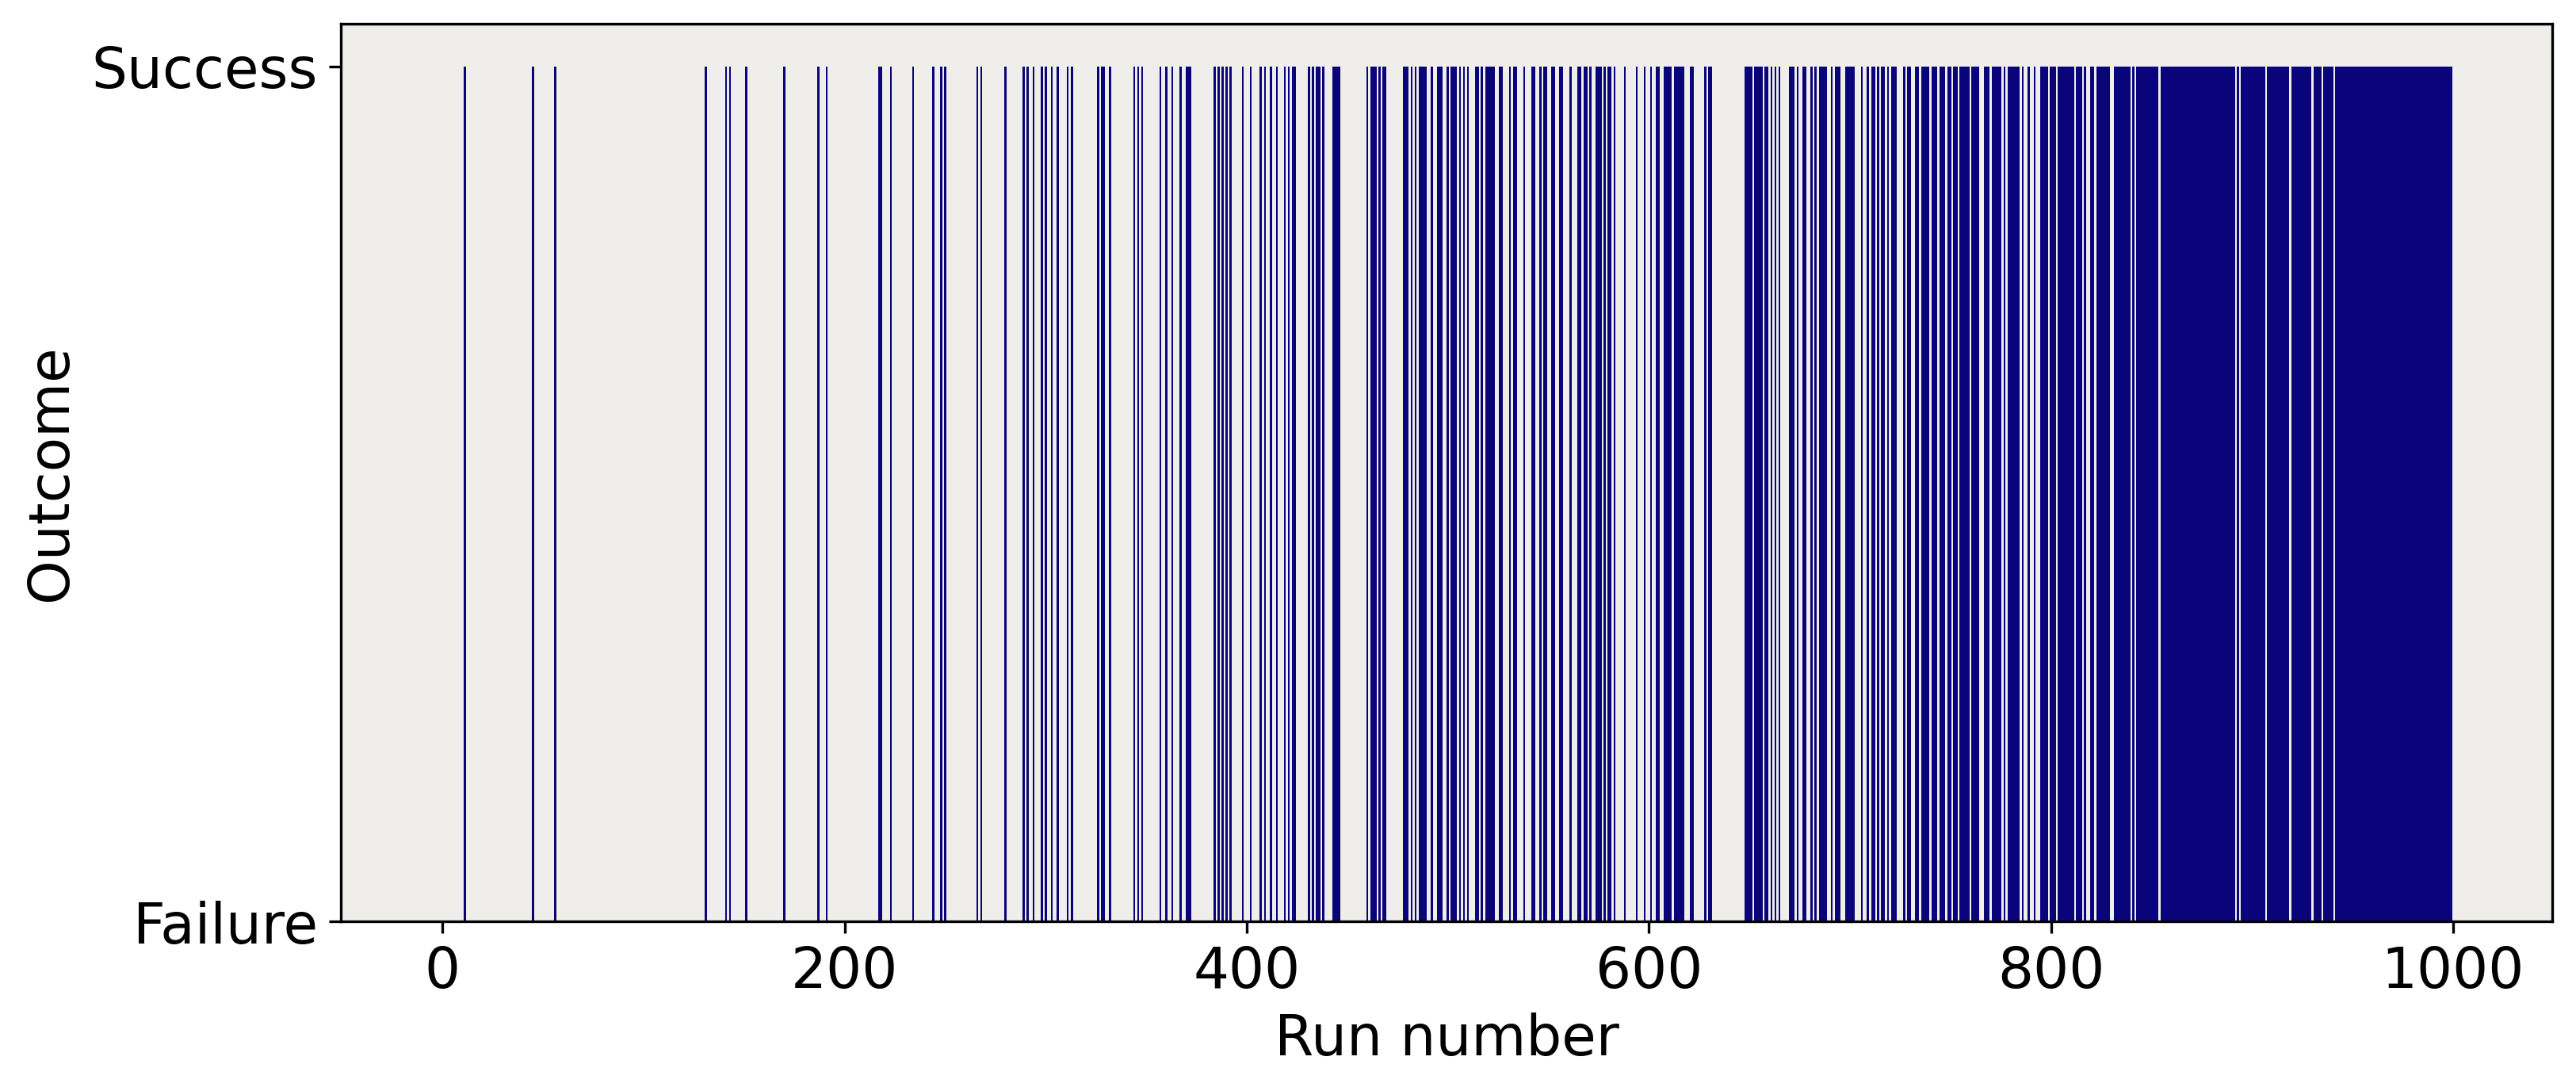

In [17]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000
alpha = 0.5
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.001

# List of outcomes
outcomes = []

print('Q-table before training: ')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training
    while not done:
        # Create a random number between 0 and 1
        rnd = np.random.random()
        
        # If the random value < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with highest value in state
        else:
            action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
    
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
    
        # Update our current state
        state = new_state  
        
        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"
            
    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('==================================')
print('Q-table after training: ')
print(qtable)


# plot

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color='#0A047A', width=1.0)
plt.show()

In [18]:
episodes = 100
nb_success = 0

# Check

for _ in range(100):
    state = environment.reset()
    done = False
    
    
    # We will keep training the agent until it gets stuck in a hole or has reached the end goal
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
        
        # Update our current state
        state = new_state
        
        # We get our reward once we reach the goal
        nb_success += reward
        
# Success rate
print(f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


### Changing alpha to 0.8

Q-table before training: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training: 
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.         0.59048987 0.5904897 ]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.6561    ]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.9        0.729     ]
 [0.81       0.9        1.         0.81      ]
 [

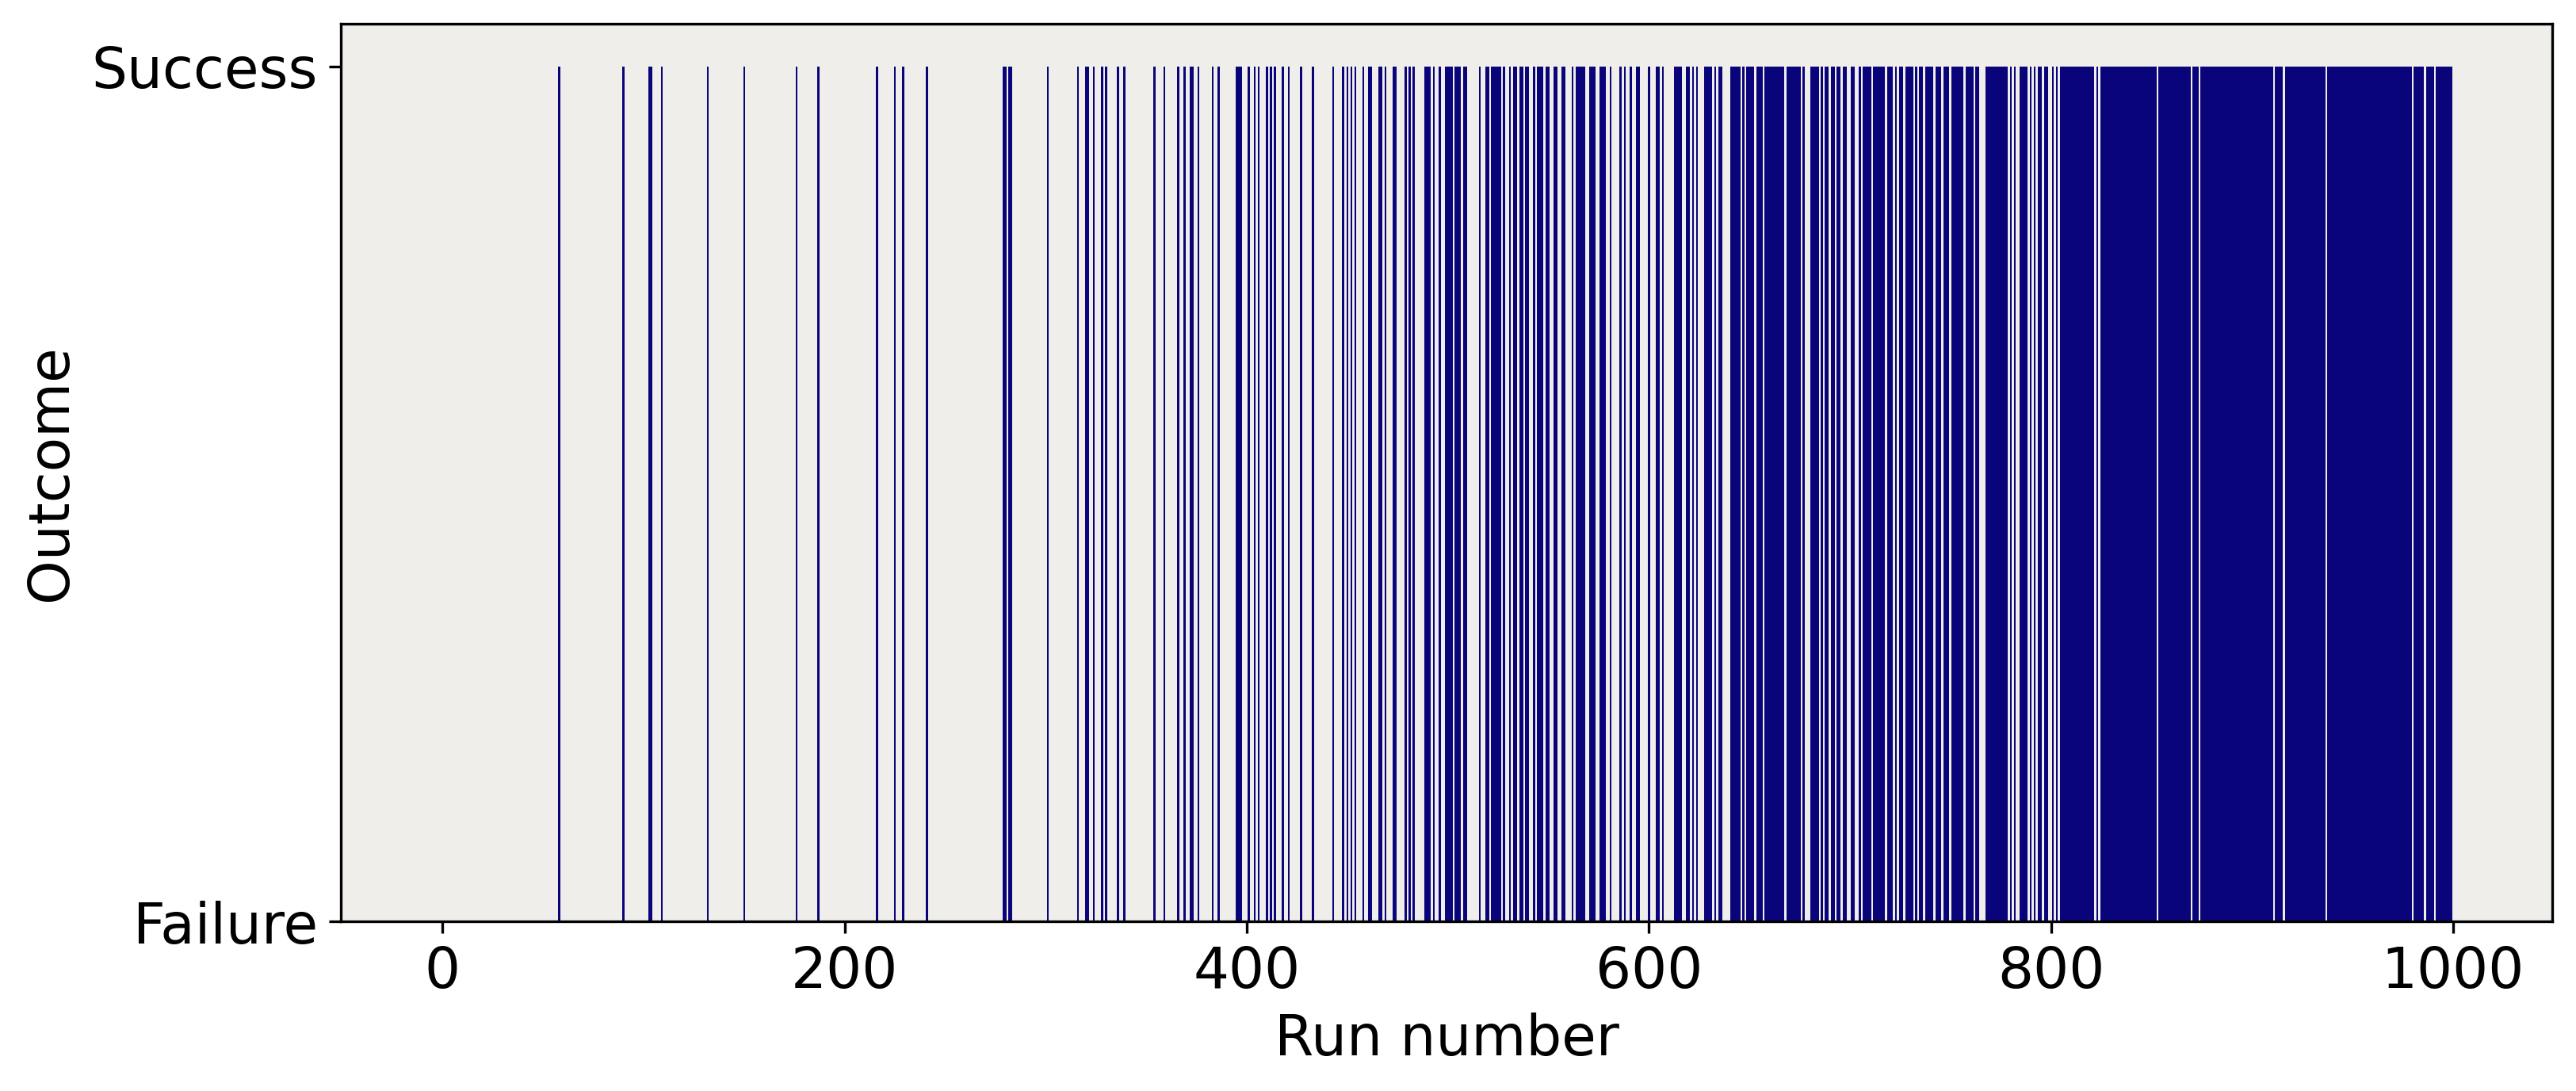

In [19]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000
alpha = 0.8
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.001

# List of outcomes
outcomes = []

print('Q-table before training: ')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training
    while not done:
        # Create a random number between 0 and 1
        rnd = np.random.random()
        
        # If the random value < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with highest value in state
        else:
            action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
    
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
    
        # Update our current state
        state = new_state  
        
        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"
            
    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('==================================')
print('Q-table after training: ')
print(qtable)


# plot

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color='#0A047A', width=1.0)
plt.show()

In [20]:
episodes = 100
nb_success = 0

# Check

for _ in range(100):
    state = environment.reset()
    done = False
    
    
    # We will keep training the agent until it gets stuck in a hole or has reached the end goal
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
        
        # Update our current state
        state = new_state
        
        # We get our reward once we reach the goal
        nb_success += reward
        
# Success rate
print(f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


### Changing alpha to 1

Q-table before training: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training: 
[[0.531441 0.59049  0.59049  0.531441]
 [0.531441 0.       0.6561   0.59049 ]
 [0.59049  0.729    0.59049  0.6561  ]
 [0.6561   0.       0.59049  0.59049 ]
 [0.59049  0.6561   0.       0.531441]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.6561  ]
 [0.       0.       0.       0.      ]
 [0.6561   0.       0.729    0.59049 ]
 [0.6561   0.81     0.81     0.      ]
 [0.729    0.9      0.       0.729   ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.9      0.729   ]
 [0.81     0.9      1.       0.81    ]
 [0.       0.       0.       0.      ]]


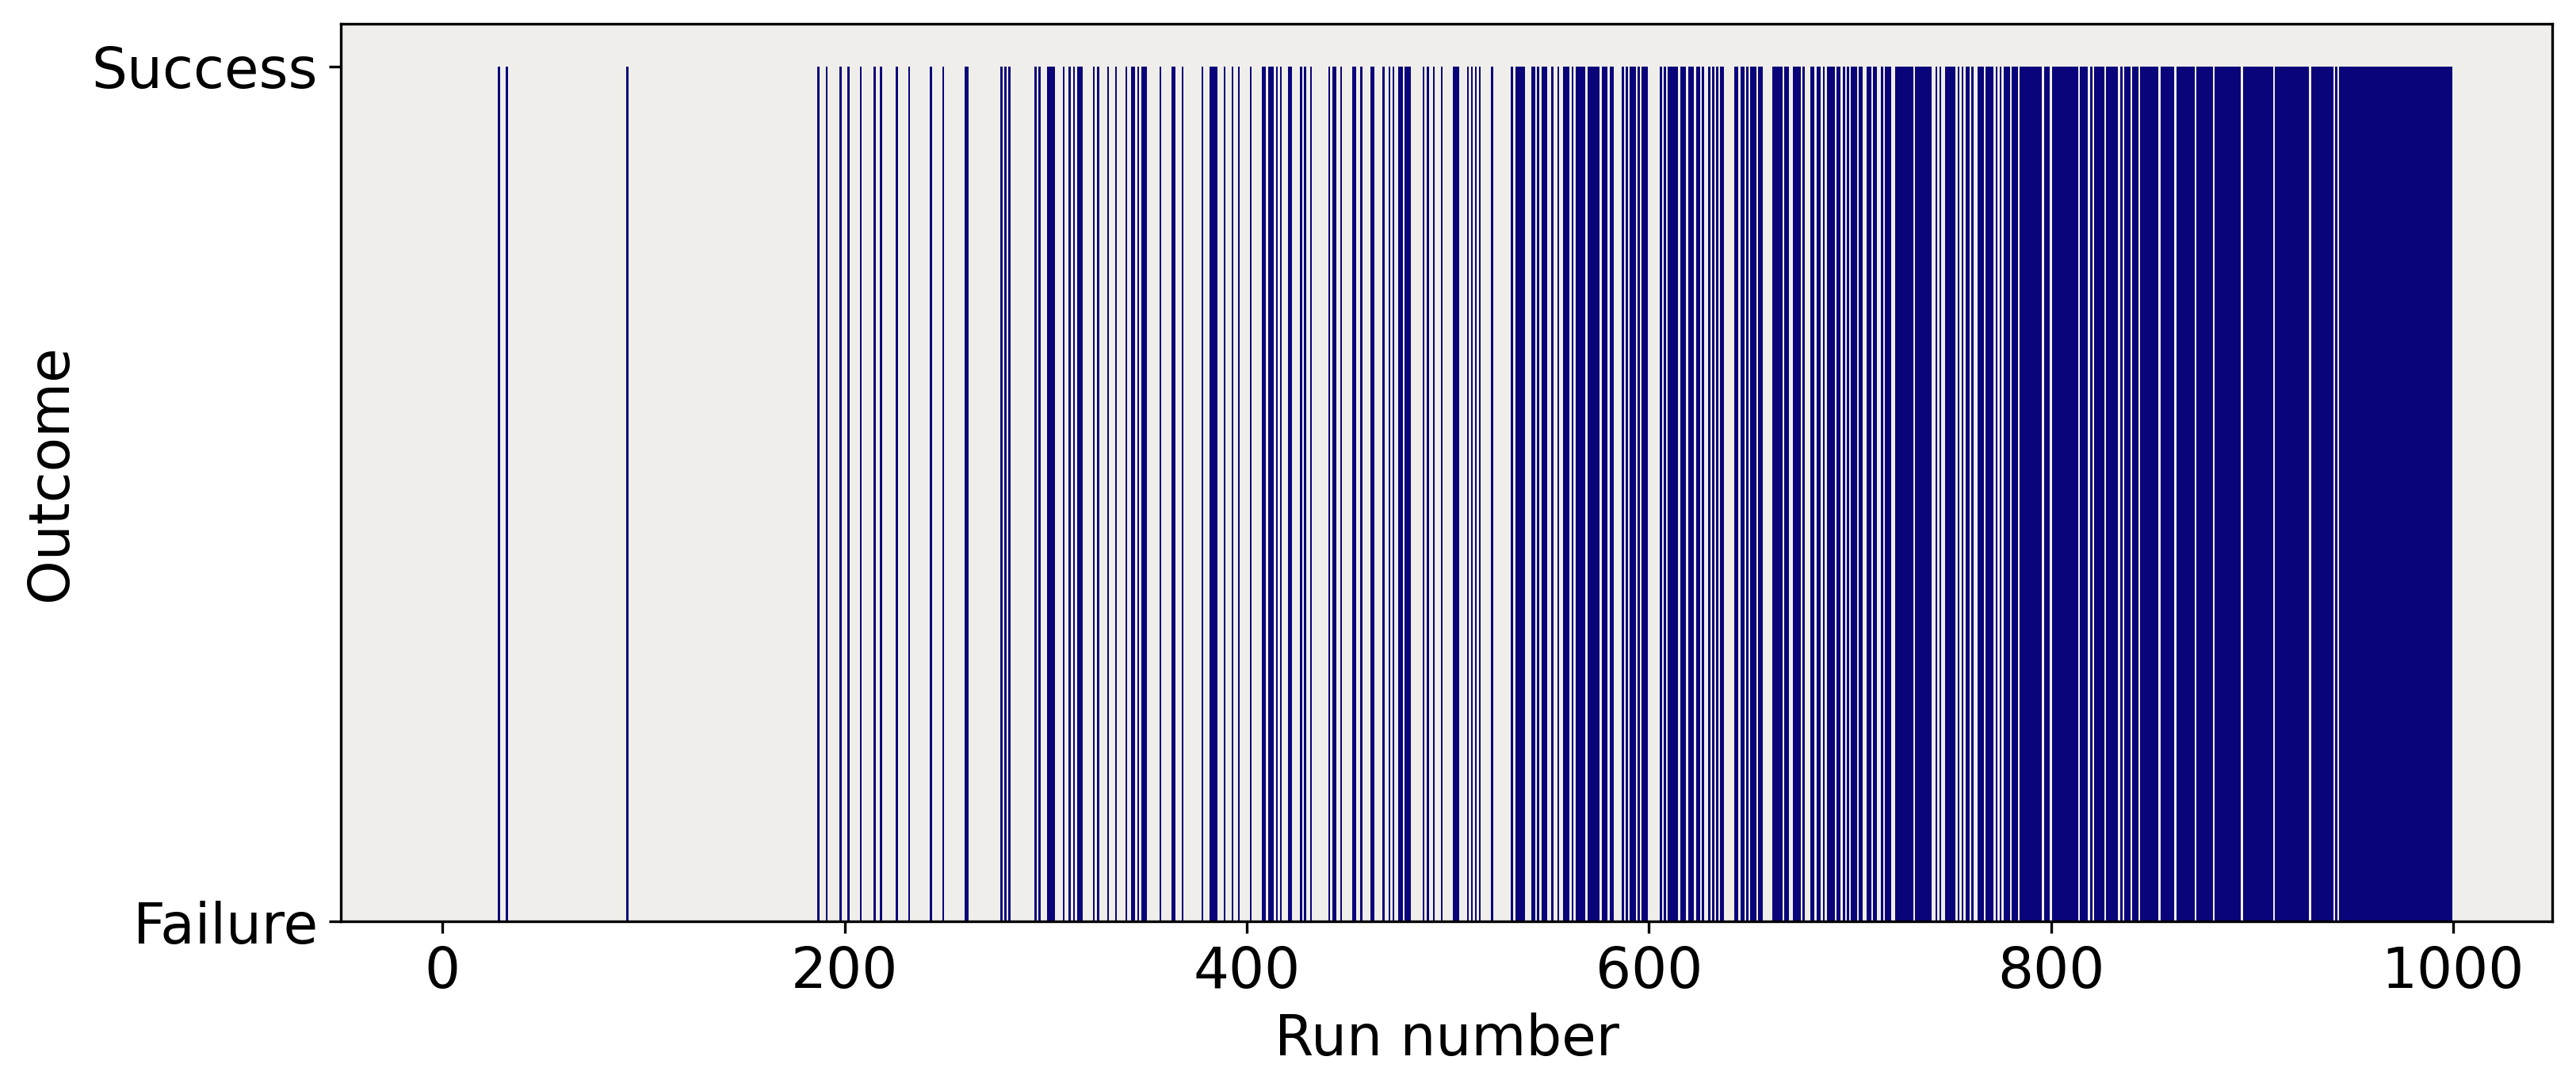

In [21]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000
alpha = 1.0
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.001

# List of outcomes
outcomes = []

print('Q-table before training: ')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training
    while not done:
        # Create a random number between 0 and 1
        rnd = np.random.random()
        
        # If the random value < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with highest value in state
        else:
            action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
    
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
    
        # Update our current state
        state = new_state  
        
        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"
            
    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('==================================')
print('Q-table after training: ')
print(qtable)


# plot

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color='#0A047A', width=1.0)
plt.show()

In [22]:
episodes = 100
nb_success = 0

# Check

for _ in range(100):
    state = environment.reset()
    done = False
    
    
    # We will keep training the agent until it gets stuck in a hole or has reached the end goal
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
        
        # Update our current state
        state = new_state
        
        # We get our reward once we reach the goal
        nb_success += reward
        
# Success rate
print(f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


### Changing gamma to 0.6

Q-table before training: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training: 
[[0.046656   0.07776    0.07776    0.046656  ]
 [0.046656   0.         0.1296     0.07760036]
 [0.07735446 0.216      0.07750998 0.12867016]
 [0.12953459 0.         0.00251584 0.06265301]
 [0.07776    0.1296     0.         0.046656  ]
 [0.         0.         0.         0.        ]
 [0.         0.36       0.         0.12583998]
 [0.         0.         0.         0.        ]
 [0.1296     0.         0.216      0.07776   ]
 [0.1296     0.36       0.36       0.        ]
 [0.21599989 0.6        0.         0.21585132]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.36       0.6        0.216     ]
 [0.36       0.6        1.         0.36      ]
 [

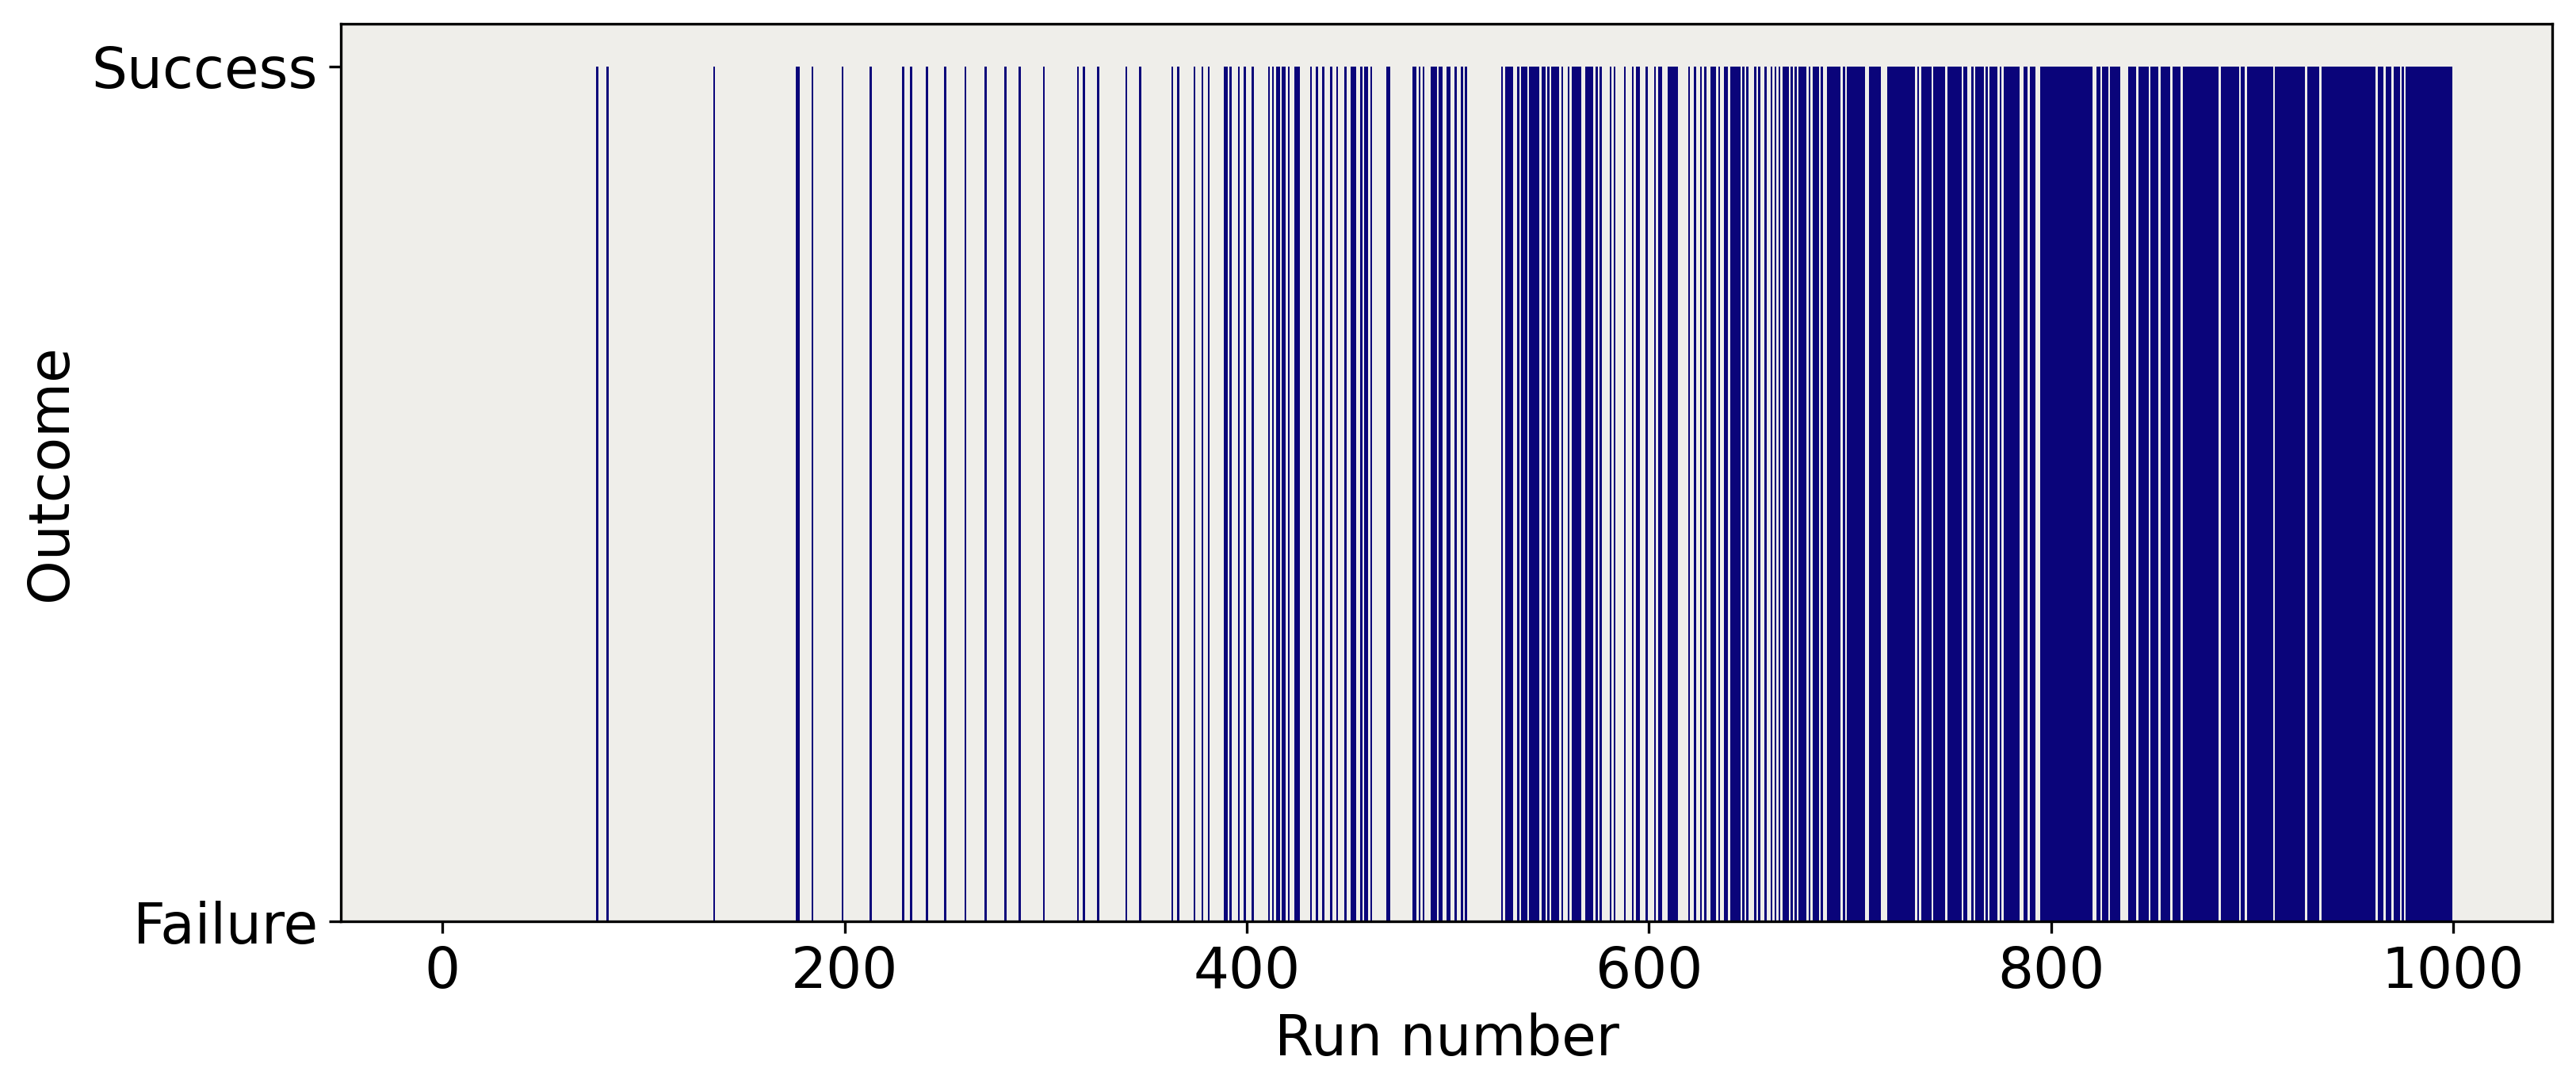

In [23]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000
alpha = 0.5
gamma = 0.6
epsilon = 1.0
epsilon_decay = 0.001

# List of outcomes
outcomes = []

print('Q-table before training: ')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training
    while not done:
        # Create a random number between 0 and 1
        rnd = np.random.random()
        
        # If the random value < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with highest value in state
        else:
            action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
    
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
    
        # Update our current state
        state = new_state  
        
        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"
            
    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('==================================')
print('Q-table after training: ')
print(qtable)


# plot

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color='#0A047A', width=1.0)
plt.show()

In [24]:
episodes = 100
nb_success = 0

# Check

for _ in range(100):
    state = environment.reset()
    done = False
    
    
    # We will keep training the agent until it gets stuck in a hole or has reached the end goal
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
        
        # Update our current state
        state = new_state
        
        # We get our reward once we reach the goal
        nb_success += reward
        
# Success rate
print(f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


### Changing gamma to 0.1

Q-table before training: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training: 
[[1.00000000e-06 1.00000000e-05 1.00000000e-07 1.00000000e-06]
 [1.00000000e-06 0.00000000e+00 9.99878268e-09 9.99999426e-08]
 [9.99997801e-08 0.00000000e+00 3.05667506e-10 5.47591603e-09]
 [6.74662748e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e-05 1.00000000e-04 0.00000000e+00 1.00000000e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.49991203e-09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e-04 0.00000000e+00 1.00000000e-03 1.00000000e-05]
 [1.00000000e-04 1.00000000e-02 1.00000000e-02 0.00000000e+00]
 [9.99956871e-04 1.00000000e-01 0.00000000e+00 2.49995602e-10]
 [0.00000000e+

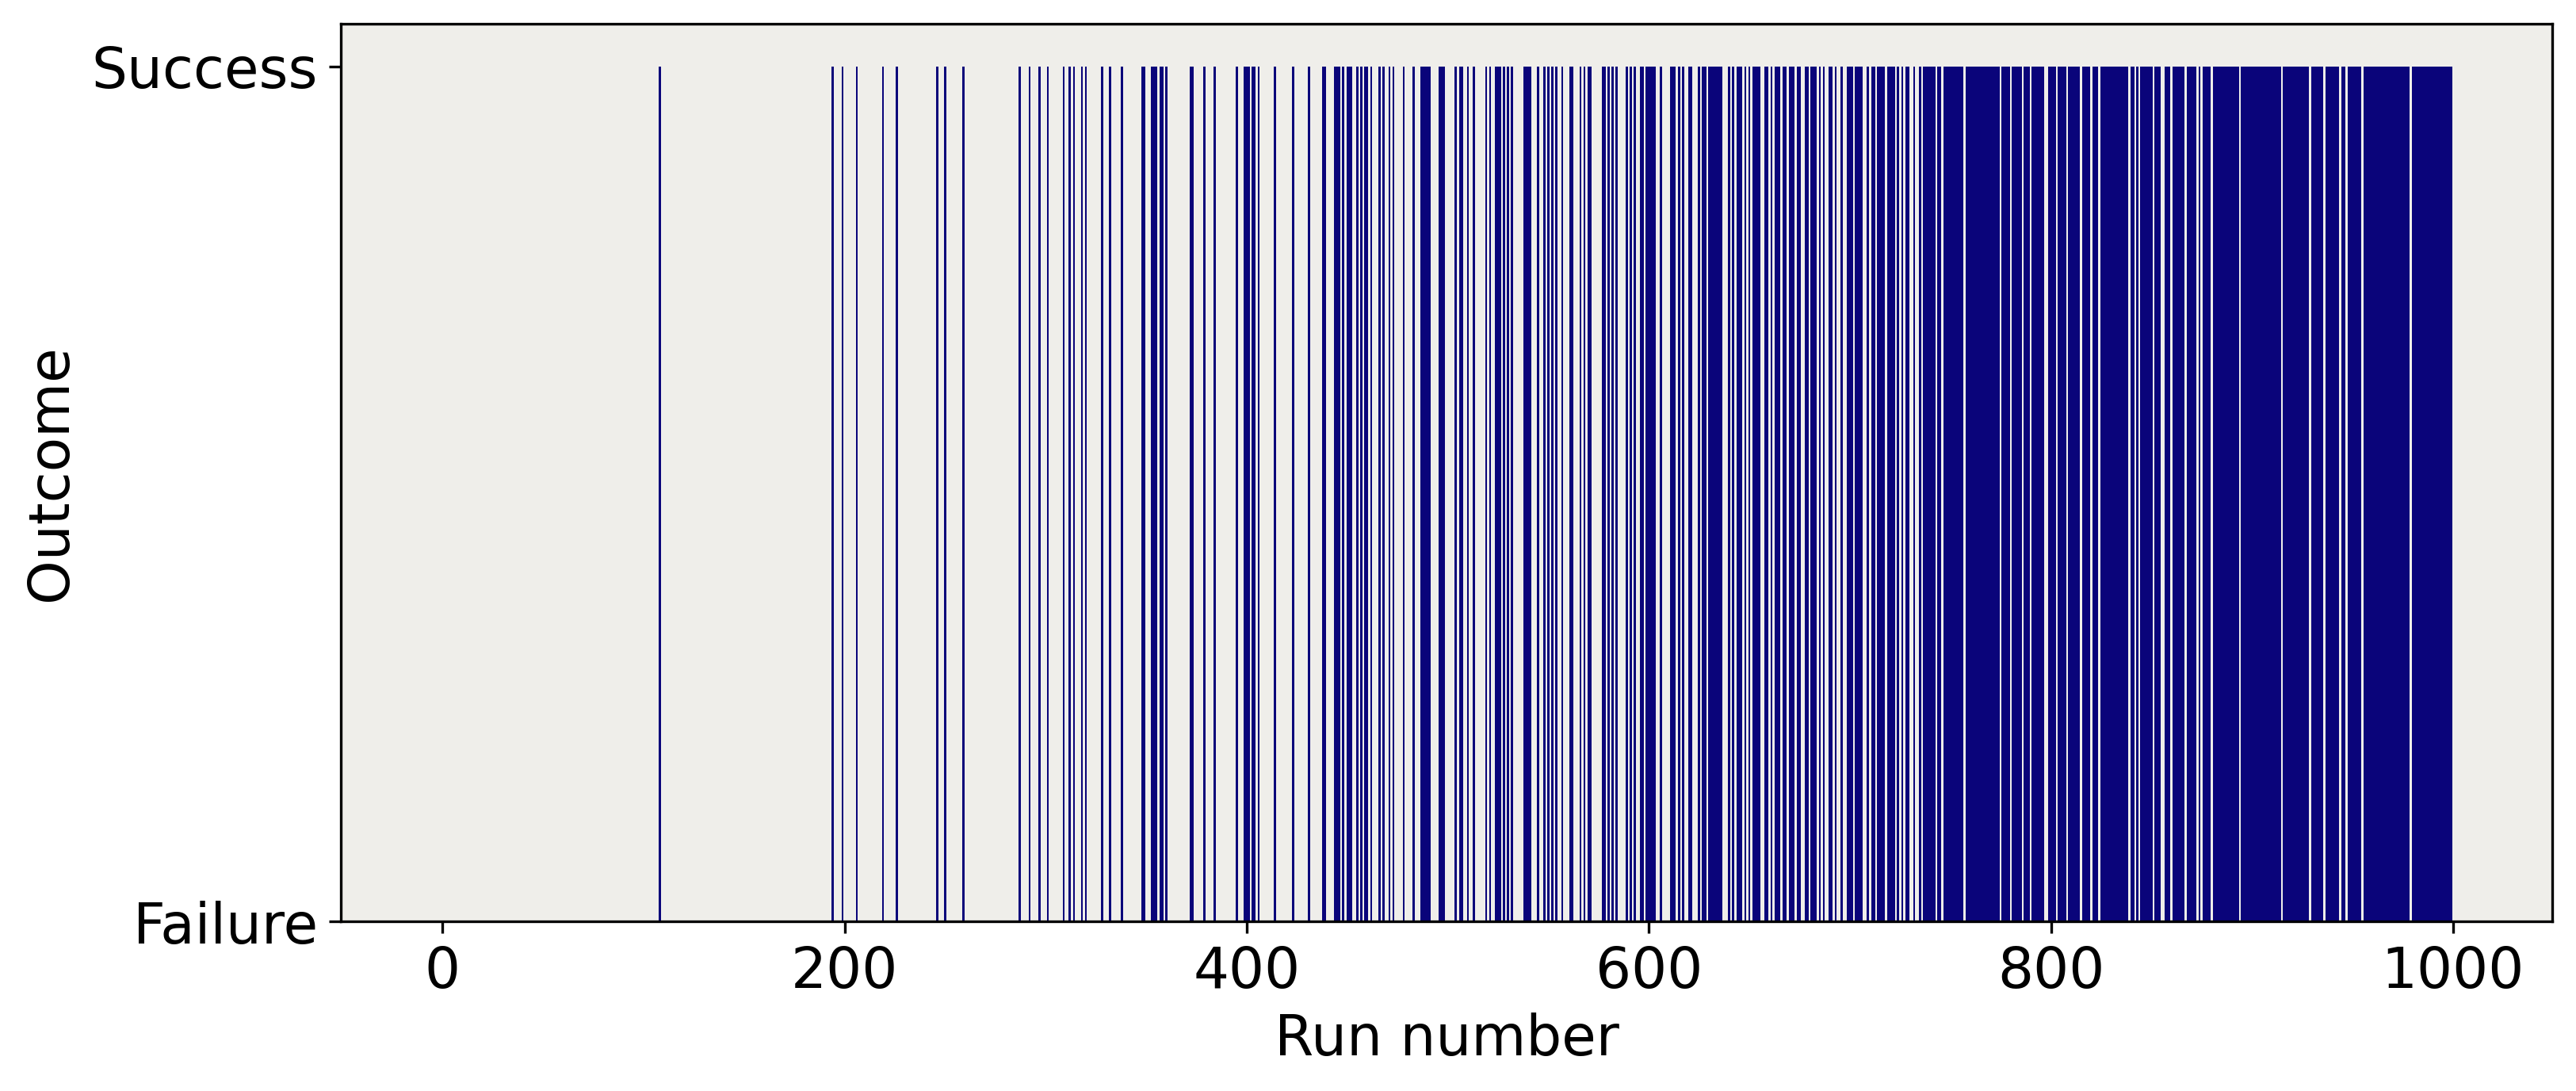

In [25]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000
alpha = 0.5
gamma = 0.1
epsilon = 1.0
epsilon_decay = 0.001

# List of outcomes
outcomes = []

print('Q-table before training: ')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training
    while not done:
        # Create a random number between 0 and 1
        rnd = np.random.random()
        
        # If the random value < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with highest value in state
        else:
            action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
    
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
    
        # Update our current state
        state = new_state  
        
        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"
            
    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('==================================')
print('Q-table after training: ')
print(qtable)


# plot

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color='#0A047A', width=1.0)
plt.show()

In [26]:
episodes = 100
nb_success = 0

# Check

for _ in range(100):
    state = environment.reset()
    done = False
    
    
    # We will keep training the agent until it gets stuck in a hole or has reached the end goal
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
        
        # Update our current state
        state = new_state
        
        # We get our reward once we reach the goal
        nb_success += reward
        
# Success rate
print(f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


### Changing epsilon to 0.8

Q-table before training: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training: 
[[6.37040665e-02 9.01337070e-03 1.05495568e-02 1.00170927e-02]
 [4.42177980e-03 4.78761639e-03 3.93986240e-03 2.31195916e-02]
 [4.60428977e-03 1.85199326e-02 4.39501129e-03 4.99098977e-03]
 [1.92883263e-03 1.97681864e-03 2.93089908e-03 1.06738613e-02]
 [9.88610263e-02 9.28300355e-03 1.01719367e-02 8.89776997e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.48071857e-03 0.00000000e+00 2.24492408e-03 1.23666961e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.11836195e-02 1.33300506e-02 1.13463728e-02 1.87962409e-01]
 [3.07183902e-02 4.53092514e-01 5.62933136e-02 5.31583424e-02]
 [3.58922854e-01 0.00000000e+00 2.85904373e-02 2.70448504e-02]
 [0.00000000e+

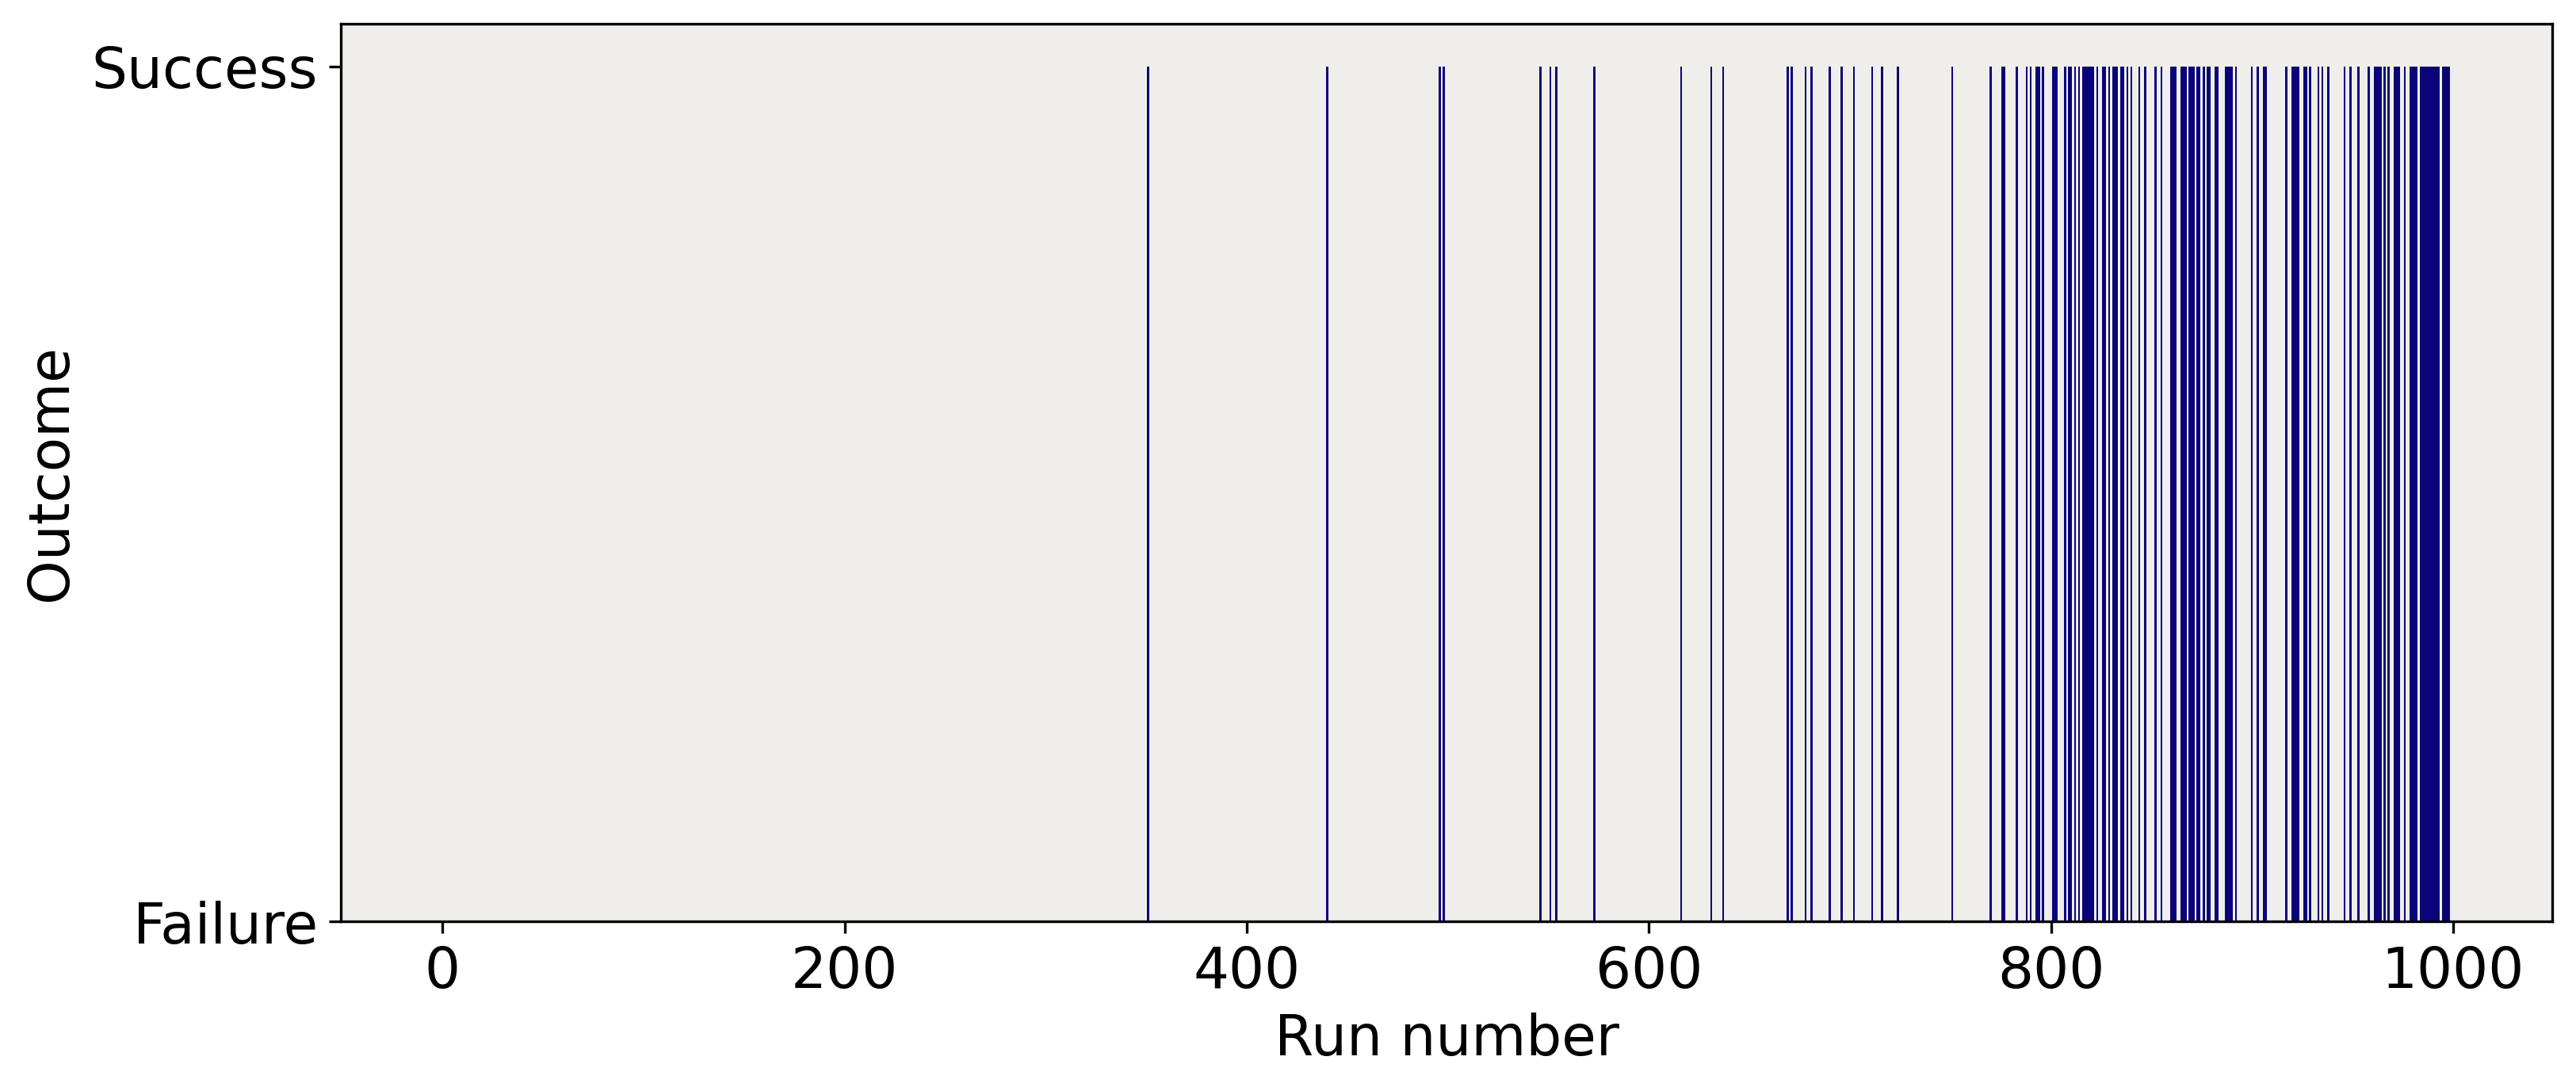

In [34]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000
alpha = 0.5
gamma = 0.9
epsilon = 0.8
epsilon_decay = 0.001

# List of outcomes
outcomes = []

print('Q-table before training: ')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training
    while not done:
        # Create a random number between 0 and 1
        rnd = np.random.random()
        
        # If the random value < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with highest value in state
        else:
            action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
    
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
    
        # Update our current state
        state = new_state  
        
        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"
            
    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('==================================')
print('Q-table after training: ')
print(qtable)


# plot

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color='#0A047A', width=1.0)
plt.show()

In [35]:
episodes = 100
nb_success = 0

# Check

for _ in range(100):
    state = environment.reset()
    done = False
    
    
    # We will keep training the agent until it gets stuck in a hole or has reached the end goal
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
        
        # Update our current state
        state = new_state
        
        # We get our reward once we reach the goal
        nb_success += reward
        
# Success rate
print(f"Success rate = {nb_success/episodes*100}%")

Success rate = 77.0%


### Changing epsilon to 0.7

Q-table before training: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training: 
[[0.0310379  0.0157322  0.0159892  0.01422274]
 [0.00544105 0.00906623 0.00251557 0.05489182]
 [0.01040743 0.02473076 0.0106033  0.0104056 ]
 [0.0067817  0.00635716 0.00210929 0.01402166]
 [0.05841071 0.00684029 0.0110499  0.01363224]
 [0.         0.         0.         0.        ]
 [0.03329886 0.00241326 0.00166834 0.00155765]
 [0.         0.         0.         0.        ]
 [0.02573035 0.02165602 0.02713733 0.1053413 ]
 [0.04388271 0.20148383 0.06032339 0.02091378]
 [0.02865466 0.12165384 0.03784707 0.02681411]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.10929233 0.10901125 0.47694016 0.08173006]
 [0.21088475 0.87330353 0.20976418 0.21933852]
 [

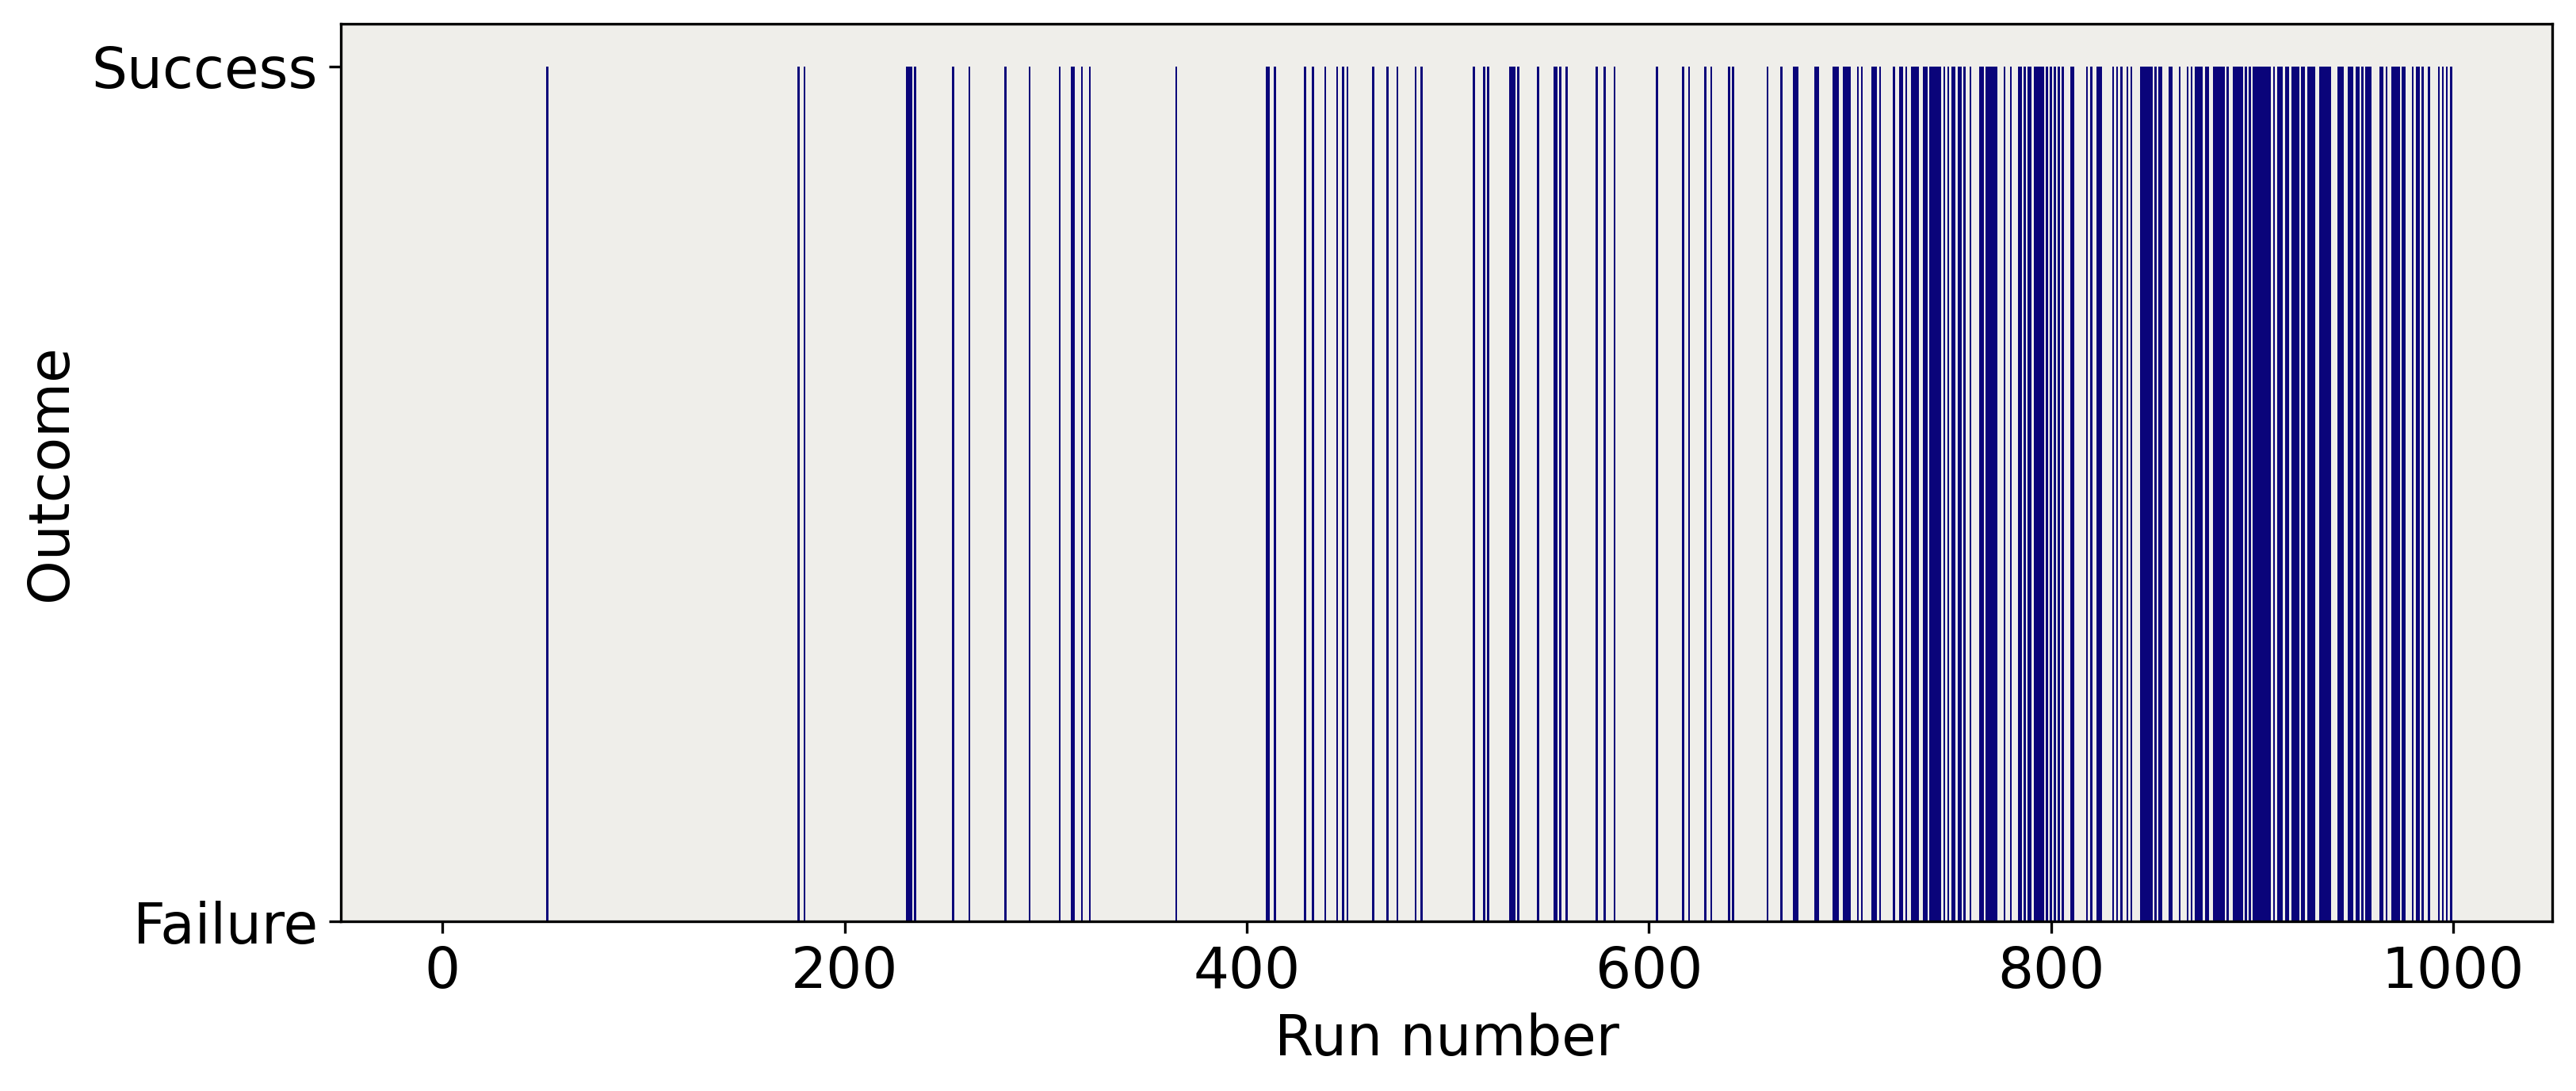

In [36]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000
alpha = 0.5
gamma = 0.9
epsilon = 0.7
epsilon_decay = 0.001

# List of outcomes
outcomes = []

print('Q-table before training: ')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training
    while not done:
        # Create a random number between 0 and 1
        rnd = np.random.random()
        
        # If the random value < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with highest value in state
        else:
            action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
    
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
    
        # Update our current state
        state = new_state  
        
        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"
            
    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('==================================')
print('Q-table after training: ')
print(qtable)


# plot

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color='#0A047A', width=1.0)
plt.show()

In [37]:
episodes = 100
nb_success = 0

# Check

for _ in range(100):
    state = environment.reset()
    done = False
    
    
    # We will keep training the agent until it gets stuck in a hole or has reached the end goal
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
        
        # Update our current state
        state = new_state
        
        # We get our reward once we reach the goal
        nb_success += reward
        
# Success rate
print(f"Success rate = {nb_success/episodes*100}%")

Success rate = 62.0%


### Changing epsilon to 0.4

Q-table before training: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


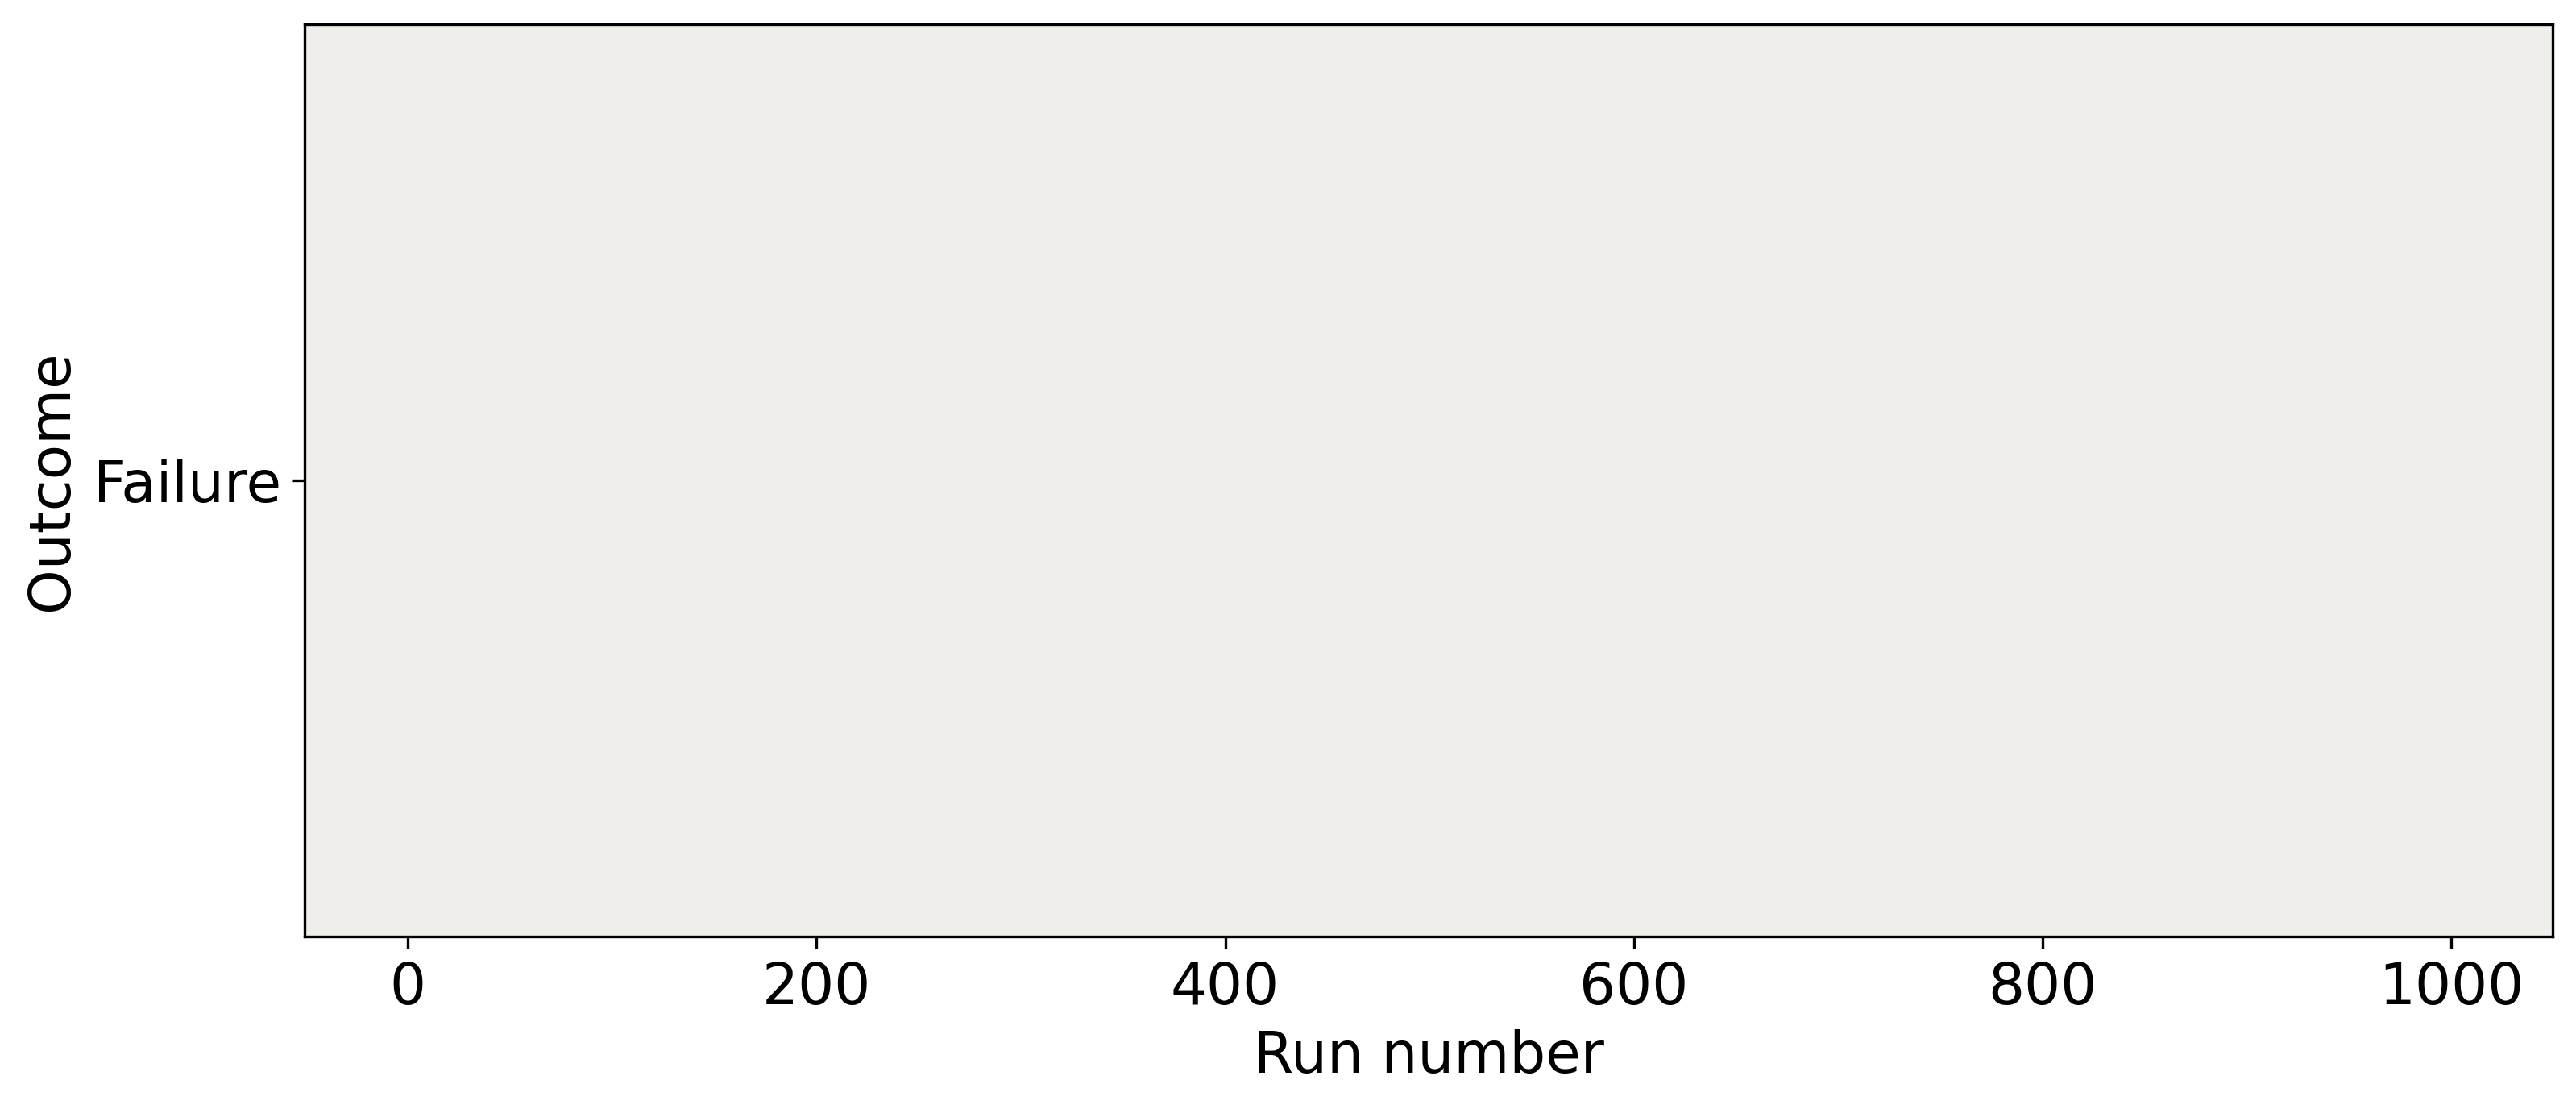

In [31]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000
alpha = 0.5
gamma = 0.9
epsilon = 0.4
epsilon_decay = 0.001

# List of outcomes
outcomes = []

print('Q-table before training: ')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training
    while not done:
        # Create a random number between 0 and 1
        rnd = np.random.random()
        
        # If the random value < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with highest value in state
        else:
            action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
    
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
    
        # Update our current state
        state = new_state  
        
        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"
            
    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('==================================')
print('Q-table after training: ')
print(qtable)


# plot

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color='#0A047A', width=1.0)
plt.show()

In [32]:
episodes = 100
nb_success = 0

# Check

for _ in range(100):
    state = environment.reset()
    done = False
    
    
    # We will keep training the agent until it gets stuck in a hole or has reached the end goal
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])
            
        # Show this action and movement the agent makes in the needed direction
        new_state, reward, done, info = environment.step(action)
        
        # Update our current state
        state = new_state
        
        # We get our reward once we reach the goal
        nb_success += reward
        
# Success rate
print(f"Success rate = {nb_success/episodes*100}%")

Success rate = 0.0%
